In [2]:
#Which areas received the most money?
#Which areas had the most applications?


# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [3]:
PPP_data = pd.read_csv('PPP Data/PPP Data 150k GA.csv')
PPP_data.head()

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,"$149,998.30",DECATUR,GA,30033,621210.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,14.0,4/14/2020,Newton Federal Bank,GA - 04
1,"$149,981.92",BLACKSHEAR,GA,31516,713910.0,Non-Profit Organization,White,Male Owned,Unanswered,Y,32.0,4/28/2020,Primesouth Bank,GA - 01
2,"$149,952.00",ELLENWOOD,GA,30294,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,14.0,6/18/2020,WebBank,GA - 04
3,"$149,952.00",DECATUR,GA,30034,484121.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,11.0,6/20/2020,WebBank,GA - 04
4,"$149,924.00",ATLANTA,GA,30338,339116.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,4/29/2020,"Wells Fargo Bank, National Association",GA - 06


In [4]:
total_city = str(PPP_data["City"].nunique())
total_city

'1257'

In [5]:
PPP_data.rename(columns = {" Loan Amount ":"Loan Amount"}, inplace=True) 

In [16]:
def elises_func(stringy):
        our_float = stringy.replace("   ","").replace("  ","").replace(" ","").replace(",","").replace("$","").replace("-","")
        if not our_float:
            our_float = 0
        else:
            our_float = float(our_float)
        
        return our_float

In [17]:
PPP_data["Loan Amount"] = PPP_data["Loan Amount"].apply(elises_func)
PPP_data.head()

AttributeError: 'float' object has no attribute 'replace'

In [8]:
PPP_data["City"].value_counts()

#Metro Atlanta has the largest applications for PPP loans (20218). 

ATLANTA           20218
MARIETTA           5604
ALPHARETTA         3823
SAVANNAH           3413
LAWRENCEVILLE      3034
                  ...  
SNEELVILLE            1
MO                    1
LAWRENCE VILLE        1
LISA                  1
EAST ELLIJAY,         1
Name: City, Length: 1257, dtype: int64

([<matplotlib.axis.XTick at 0x1839ce51448>,
 <a list of 10 Text xticklabel objects>)

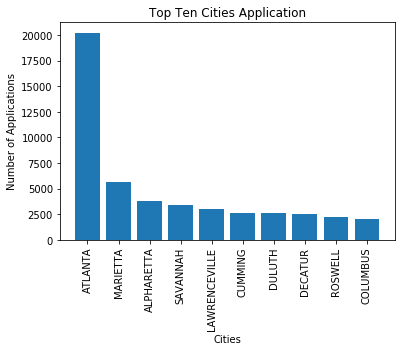

In [9]:
city_most_app = PPP_data["City"].value_counts()
number_of_applications = PPP_data.groupby("City").nunique()
averageLoanAmount = PPP_data.groupby('City').mean()["Loan Amount"]
averageJobsRetained = PPP_data.groupby('City').mean()['JobsRetained']

bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]
# Create labels for these bins
labels = ["<$25K", "<$50K","<$75K", "<$100K","<$125K", "<$150K"]
top_ten_cities = city_most_app.head(10)

top_ten_cities_df=pd.DataFrame(top_ten_cities )
top_ten_cities_df
x=top_ten_cities_df.index
y=top_ten_cities_df["City"]
plt.title("Top Ten Cities Application")
plt.xlabel("Cities")
plt.ylabel("Number of Applications")
plt.bar(x,y)
plt.xticks(x, rotation="vertical")

In [10]:
def city_func(citystringy):
        our1_str = citystringy.replace("{","").replace(" ","").replace(",","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","")
        if not our1_str:
            our1_str != 1
        else:
            our1_str = str(our1_str)
        
        return our1_str

In [11]:
PPP_data["City"] = PPP_data["City"].apply(city_func)
PPP_data.head(10)

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149998.30,DECATUR,GA,30033,621210.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,None,14.0,4/14/2020,Newton Federal Bank,GA - 04
1,149981.92,BLACKSHEAR,GA,31516,713910.0,Non-Profit Organization,White,Male Owned,Unanswered,Y,32.0,4/28/2020,Primesouth Bank,GA - 01
2,149952.00,ELLENWOOD,GA,30294,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,14.0,6/18/2020,WebBank,GA - 04
3,149952.00,DECATUR,GA,30034,484121.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,11.0,6/20/2020,WebBank,GA - 04
4,149924.00,ATLANTA,GA,30338,339116.0,Corporation,Unanswered,Unanswered,Unanswered,None,0.0,4/29/2020,"Wells Fargo Bank, National Association",GA - 06
5,149920.00,SUGARHILL,GA,30518,236220.0,Corporation,Unanswered,Unanswered,Unanswered,None,9.0,4/27/2020,Peoples Bank & Trust,GA - 07
6,149910.00,ROSWELL,GA,30075,722513.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,None,17.0,4/29/2020,Pinnacle Bank,GA - 06
7,149900.00,MORROW,GA,30260,562119.0,Subchapter S Corporation,White,Male Owned,Non-Veteran,None,0.0,4/16/2020,CornerstoneBank,GA - 05
8,149900.00,ATLANTA,GA,30305,522310.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,9.0,4/4/2020,Ameris Bank,GA - 05
9,149900.00,COMER,GA,30629,238220.0,Corporation,Unanswered,Unanswered,Unanswered,None,18.0,4/14/2020,United Community Bank,GA - 09


In [12]:
clean_cities = PPP_data[PPP_data["Loan Amount"] >= 0]
clean_cities["City"].value_counts()
sorted_clean_cities = clean_cities.sort_values(by="Loan Amount",ascending=False)
sorted_clean_cities

,Loan Amount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149998.30,DECATUR,GA,30033,621210.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,None,14.0,4/14/2020,Newton Federal Bank,GA - 04
1,149981.92,BLACKSHEAR,GA,31516,713910.0,Non-Profit Organization,White,Male Owned,Unanswered,Y,32.0,4/28/2020,Primesouth Bank,GA - 01
2,149952.00,ELLENWOOD,GA,30294,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,14.0,6/18/2020,WebBank,GA - 04
3,149952.00,DECATUR,GA,30034,484121.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,11.0,6/20/2020,WebBank,GA - 04
4,149924.00,ATLANTA,GA,30338,339116.0,Corporation,Unanswered,Unanswered,Unanswered,None,0.0,4/29/2020,"Wells Fargo Bank, National Association",GA - 06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138514,2.00,MARIETTA,GA,30067,445110.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,5.0,4/30/2020,"Bank of America, National Association",GA - 06
138515,1.00,ATLANTA,GA,30339,236115.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,None,1.0,5/29/2020,"Bank of America, National Association",GA - 06
138516,1.00,SAVANNAH,GA,31415,485119.0,Sole Proprietorship,Unanswered,Unanswered,Unanswered,None,0.0,5/15/2020,"Wells Fargo Bank, National Association",GA - 01
138517,0.00,GAINESVILLE,GA,30504,561990.0,Corporation,Unanswered,Unanswered,Unanswered,None,2.0,5/3/2020,"Bank of America, National Association",GA - 09


In [13]:
cities_max = clean_cities.groupby("City").sum().sort_values("Loan Amount",ascending=False) 
cities_max["Loan amounts in Millions"] = round(cities_max["Loan Amount"] / 1000000, 2)
cities_max.head(10)

,Loan Amount,Zip,NAICSCode,JobsRetained,Loan amounts in Millions
City,,,,,
ATLANTA,6.764249e+08,613314438,-3.634009e+21,-1.556905e+22,676.42
MARIETTA,1.806385e+08,168499452,-1.199038e+21,-4.021390e+21,180.64
ALPHARETTA,1.344604e+08,114731677,-8.024334e+20,-2.370407e+21,134.46
SAVANNAH,1.206367e+08,107194013,-5.718491e+20,-1.835451e+21,120.64
CUMMING,8.207912e+07,79275211,-4.796153e+20,-1.577197e+21,82.08
LAWRENCEVILLE,8.196713e+07,91184863,-4.611686e+20,-2.278173e+21,81.97
DULUTH,7.927629e+07,78552184,-4.334985e+20,-1.743217e+21,79.28
MACON,7.378171e+07,62912141,-2.121376e+20,-1.411176e+21,73.78
AUGUSTA,7.290969e+07,61996619,-1.660207e+20,-9.500073e+20,72.91


In [14]:
cities_max.count

<bound method DataFrame.count of                      Loan Amount        Zip     NAICSCode  JobsRetained  \
City                                                                      
ATLANTA             6.764249e+08  613314438 -3.634009e+21 -1.556905e+22   
MARIETTA            1.806385e+08  168499452 -1.199038e+21 -4.021390e+21   
ALPHARETTA          1.344604e+08  114731677 -8.024334e+20 -2.370407e+21   
SAVANNAH            1.206367e+08  107194013 -5.718491e+20 -1.835451e+21   
CUMMING             8.207912e+07   79275211 -4.796153e+20 -1.577197e+21   
...                          ...        ...           ...           ...   
RINGGOLDQ           1.002500e+03      30736  4.533100e+05  1.000000e+00   
SAINTSIMMONSISLAND  1.000000e+03      31522  8.121120e+05  1.000000e+00   
BOULDERCRESTROAD    1.000000e+03      30294  4.853200e+05  0.000000e+00   
PORTWENWORTH        1.000000e+03      31407  4.853100e+05  5.000000e+02   
LAWRENCILLE         5.350000e+02      30045  4.841210e+05  1.000000

([<matplotlib.axis.XTick at 0x183a163ee08>,
 <a list of 10 Text xticklabel objects>)

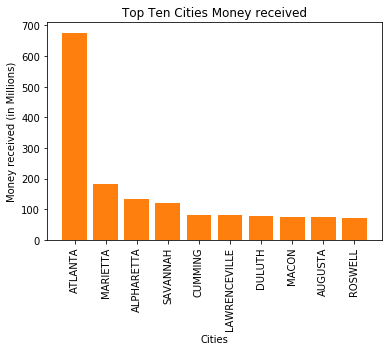

In [15]:
#Which areas received the most money?

top_ten_cities1 = cities_max.head(10)


x=top_ten_cities1.index
y=top_ten_cities1["Loan amounts in Millions"]
plt.bar(x,y)
plt.xticks(x, rotation="vertical")

plt.title("Top Ten Cities Money received")
plt.xlabel("Cities")
plt.ylabel("Money received (in Millions)")
plt.bar(x,y)
plt.xticks(x, rotation="vertical")